<a href="https://colab.research.google.com/github/farhan-najeeb/iris_classification/blob/main/sc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
import pandas as pd
# iris = load_iris()
# ir = pd.DataFrame(iris.data)
# ir.columns = iris.feature_names
# ir['CLASS'] = iris.target
# ir.head()
colnames=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','Species']

In [ ]:
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=colnames)

In [ ]:
iris=iris[iris['Species']!='Iris-virginica']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


DATA NORMALIZATION

In [ ]:
X = preprocessing.scale(iris.drop('Species',axis=1))

ONE HOT ENCODING

In [ ]:
Y = pd.get_dummies(iris['Species'])

In [ ]:
Y.shape

(100, 2)

TRAINING

In [ ]:


#training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
epoch = 20

#model
model = Sequential()
model.add(Dense(6, input_dim=4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#fitting the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epoch, batch_size=1)

Epoch 1/20
80/80 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.6750 - val_loss: 0.5949 - val_accuracy: 0.8000
Epoch 2/20
80/80 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.9000 - val_loss: 0.4384 - val_accuracy: 0.9500
Epoch 3/20
80/80 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 1.0000 - val_loss: 0.3005 - val_accuracy: 0.9500
Epoch 4/20
80/80 [==============================] - 0s 1ms/step - loss: 0.2069 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9500
Epoch 5/20
80/80 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 1.0000 - val_loss: 0.1265 - val_accuracy: 0.9500
Epoch 6/20
80/80 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 1.0000
Epoch 7/20
80/80 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 8/20
80/80 [==

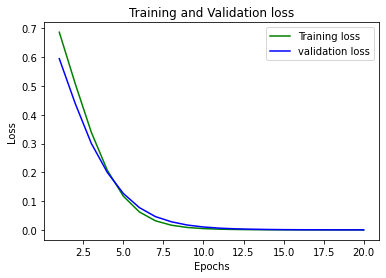

In [ ]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch +1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

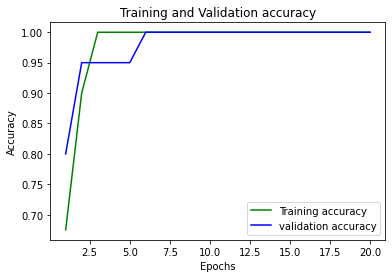

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,(epoch +1))
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# def get_prediction(X):
import numpy as np
#   X = preprocessing.scale(X)
#   # Y = np.argmax(model.predict(X))
#   Y=model.predict_classes(X)
print(np.argmax(model.predict(X_test[4:5]),axis=1))
# print(model.predict(X_test[3:4]))
print(Y_test[4:5].values)
  # def numbers_to_strings(argument):
  #   switcher = { 
  #        0:"setosa", 
  #        1:"versicolor",  
  #        }  
  #   return switcher.get(argument, "nothing")
  # print(numbers_to_strings(Y))

[0]
[[1 0]]


In [ ]:
Y_test[:5]

In [ ]:
get_prediction([[7.0,3.2,4.7,1.4]])

In [ ]:
get_prediction([[6.3,3.3,6.0,2.5]])

In [ ]:
5.1	3.5	1.4	0.2